In [1]:
import tkinter as tk
from tkinter import messagebox
import tkinter.font as font
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import sys
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
def get_dataset():
    '''
    This function fetches the Iris dataset from the Seaborn library as a DataFrame object.

    I. Get a list of all datasets available in the Seasborn library
       https://github.com/mwaskom/seaborn-data
       https://seaborn.pydata.org/generated/seaborn.get_dataset_names.html

    II. Use the filter() function with a lambda to filter elements in the datasets names list returned by Seaborn 
        containing the 'iris' string. As the previous is wrapped in list, we then access it by indexing the first and only result 
        returned by the lambda function.
        https://seaborn.pydata.org/generated/seaborn.load_dataset.html
        https://www.w3resource.com/python-exercises/lambda/python-lambda-exercise-39.php

    III. Load the Iris dataset which is a DataFrame object by default, as the Seaborn library is closely integrated with pandas 
         data structures. Then we use the return statement to send the DataFrame back to the caller of the function, enabling 
         analysis.py to access the Iris dataset.
         https://seaborn.pydata.org/generated/seaborn.load_dataset.html)]
    '''

    # I.
    # Get a list of all datasets available in the Seasborn library
    datasets_list = sns.get_dataset_names()

    # II.
    # Access the list returned by Seaborn with datasets names
    iris_dataset = list(filter(lambda x: "iris" in x, datasets_list))[0]

    # Print dataset name (uncomment for sanity check) 
    #print(f"Dataset name is: {iris_dataset}")

    # III.
    # Load the Iris dataset as df
    df = sns.load_dataset(iris_dataset)

    # Return the DataFrame object
    return df

df = get_dataset()

Sure! Imagine you have a big box of colored marbles. Each marble has different properties, like color, size, and weight. Let's say you want to organize these marbles in a way that makes it easier to understand their differences and similarities. However, looking at all these properties at once can be really confusing.

Principal Component Analysis (PCA) is a bit like a magical tool that helps you simplify this task. Here’s how it works:

Identify Key Traits: PCA looks at all the different properties of the marbles (like color, size, and weight) and tries to find the main traits that capture most of the differences between them. These main traits are called "principal components."

Simplify the View: Instead of having to look at all the different properties separately, PCA combines them into a smaller number of new properties (the principal components). These new properties are designed to summarize the most important information about the marbles.

Reduce Complexity: By focusing on just the principal components, you can often reduce the number of things you need to consider. For example, instead of looking at 10 different properties, you might only need to look at 2 or 3 principal components to get a good sense of the differences between the marbles.

Visualize: Once PCA has done its job, you can create simple plots that show how the marbles are spread out based on these principal components. This makes it much easier to see patterns, like groups of similar marbles or unusual ones that stand out.

In essence, PCA helps you take a complex set of data and boil it down to its most important parts, making it much easier to understand and work with. It's like turning a messy, cluttered room into a neat and organized space where you can quickly find what you need.


This code reduces the 4-dimensional Iris data to 2 dimensions and visualizes it, helping to see how the different species of iris flowers are distributed in this reduced space.

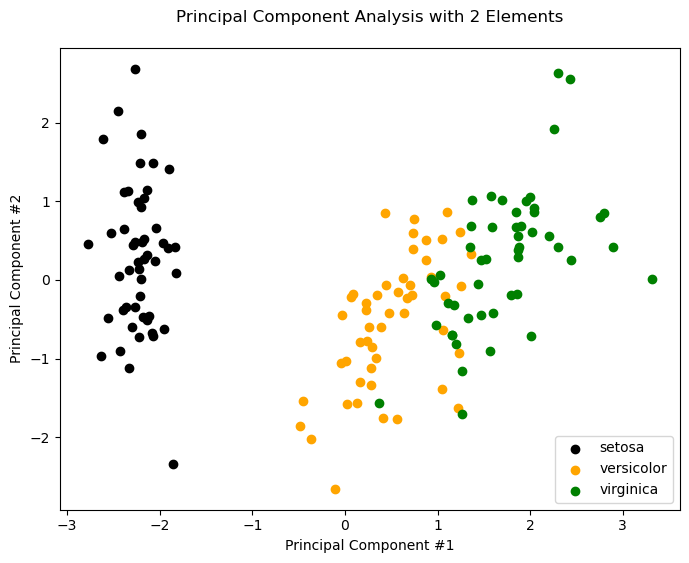

In [34]:
# https://www.turing.com/kb/guide-to-principal-component-analysis
# https://towardsdatascience.com/a-step-by-step-introduction-to-pca-c0d78e26a0dd

# Standardise the range of variables to analyse the contribution of each variable equally. This calculation
# categorises the variables that are dominating the other variables of small ranges, preventing a biased result. 
# The goal is to mimic a normal distribution by having a mean of 0 and a standard deviation of 1.
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
columns = df.select_dtypes(include='number').columns
x = df.loc[:, columns].values
x = StandardScaler().fit_transform(x)

# Apply PCA, reducing the dataset to 2 components/variables
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

# Create new DataFrame with the variables created by sklearn when computing the PCA, concatenating it
# along the columns with the original df containing only the species column. Since both DataFrames have 
# the same number of rows and are concatenated along the columns, the original df filtered for species
# is added as a new column to pca_df. Therefore, this concat aligns the species datapoints with the respective PCA based on the index.
pca_df = pd.DataFrame(data=principal_components, columns=['PCA_1', 'PCA_2'])
pca_df = pd.concat([pca_df, df[['species']]], axis=1)

# Visualize the PCA result
# Create a dict object mapping colours to the different species
# https://stackoverflow.com/questions/70356069/defining-and-using-a-dictionary-of-colours-in-a-plot
colors = {'setosa': 'black', 'versicolor': 'orange', 'virginica': 'green'}
species = df['species'].unique()

# Define plot size
plt.figure(figsize=(8, 6))

# Loop through each species in the DataFrame, applying the same logic as in generate_histogram()
for spec in species:
    # Filter dataframe for the current species
    df_species = pca_df['species'] == spec
    plt.scatter(pca_df.loc[df_species, 'PCA_1'],
                pca_df.loc[df_species, 'PCA_2'],
                color=colors[spec])

# Format scatterplot
plt.legend(species)
plt.xlabel('Principal Component #1')
plt.ylabel('Principal Component #2')
plt.title('Principal Component Analysis with 2 Elements\n')
plt.show()